# Projet 6: Analysez les ventes d'une librairie avec R ou Python 

# Introduction 

Dans ce projet, il est demandé d'analyser et de rapprocher les données de trois fichiers csv "products", customers et "transactions". 
La table "products" contient les reférences des livres, leurs prix de vente. La table "customers" contient les informations des clients du site. La table "transactions" contients les achats effectués sur le site..

# Objectif: 
    Faire le point après deux ans d'exercice,
    pouvoir analyser ses points forts,
    pouvoir analyser ses points faibles,
    pouvoir analyser les comportements clients,etc.

# Exploration

J' importe les modules necessaires pour l'analyse.

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Je charge les datasets dans des dataframes.

In [13]:
df_customers = pd.read_csv('customers.csv')
df_products =pd.read_csv('products.csv')
df_transactions=pd.read_csv('transactions.csv')

Je vérifie d'abord les dimensions de chaque fichiers (nombre de lignes et nombre de colonnes)

In [14]:
print(os.linesep.join([ "customers : " + str(df_customers.shape), "products : " + str(df_products.shape), "transactions : " + str(df_transactions.shape) ]))

customers : (8623, 3)
products : (3287, 3)
transactions : (679532, 4)


On constate qu'il y a plus lignes dans "transactions" que dans le fichier "customers" et "products".</br> 
C'est normal car ce dataframe contient toutes les transactions.

### Quels sont les informations contenues dans les dataframes ?

In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Une transaction est faite sur un produit ( *id_prod* ), à une date (*date*) , et par un client (*client_id*).

In [36]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Un produit a un prix et une catégorie.

In [37]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Un client a une année de naissance ( *birth*) et un genre (*sex*) </br>
Regardons maintenant un apperçu des données contenues dans les dataframes:

In [46]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [49]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [48]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
print(os.linesep.join(["Colonnes de customers : " + str(list(df_customers)), "Colonnes de products : " + str(list(df_products)) ,  "Colonnes de transactions : " + str(list(df_transactions))] ))

Colonnes de customers : ['client_id', 'sex', 'birth']
Colonnes de products : ['id_prod', 'price', 'categ']
Colonnes de transactions : ['id_prod', 'date', 'session_id', 'client_id']


### Il y a t-il des valeurs manquantes dans les fichiers? 

In [7]:
print(os.linesep.join(["Nombre de valeur manquantes par fichier:", 
    "1)**Dans df_products***\n {} \n".format(str(df_products.isnull().sum().sort_values(ascending=False)) ),  
    "2)**Dans df_customers***\n {} \n".format(str(df_customers.isnull().sum().sort_values(ascending=False)) ),  
    "3)**Dans df_transactions***\n {} \n".format(str(df_transactions.isnull().sum().sort_values(ascending=False)) )]
    )
)

Nombre de valeur manquantes par fichier:
1)**Dans df_products***
 id_prod    0
price      0
categ      0
dtype: int64 

2)**Dans df_customers***
 client_id    0
sex          0
birth        0
dtype: int64 

3)**Dans df_transactions***
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64 



Il n'y a pas de valeur manquante (nulle) dans les trois fichiers.

### Quels valeurs peut prendre le prefix dans 'client_id',  dans 'session_id'?
On note la présence d'un préfix pour ces variables.
Je sépare le préfixe et le suffixe de la colonne de 'client_id'.

In [15]:
df_transactions1=df_transactions.copy()
df_transactions1["client_id_prefix"]= df_transactions1.client_id.str.extract(r'^(\w+)_',expand= True)
df_transactions1["client_id_suffix"]= df_transactions1.client_id.str.extract(r'_(\w+)$',expand=True)
df_transactions1["session_id_prefix"]= df_transactions1.session_id.str.extract(r'^(\w+)_',expand=True)

On regarde le dataframe. 

In [53]:
df_transactions1.head()

,id_prod,date,session_id,client_id,client_id_prefix,client_id_suffix,session_id_preifx
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,c,103,s
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,c,8534,s
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,c,6714,s
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,c,6941,s
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,c,4232,s


On vérifie pour les valeurs de prefix de client id

In [57]:
"Valeurs pour le prefix de 'client_id' : {}, pour 'session_id' : {} ".format(df_transactions1.client_id_prefix.unique(), df_transactions1.session_id_prefix.unique())

"Valeurs pour le prefix de 'client_id' : ['c' 'ct'], pour 'session_id' : ['s'] "

On constate qu'il y a deux valeurs de prefixe dans "id_client", une seule pour 'session_id' \
Je sélectionne les lignes avec le prefixe de 'ct' dans "id_client".

In [16]:
mask_ct = df_transactions1.client_id_prefix.eq("ct")
df_transactions1[mask_ct].head()

,id_prod,date,session_id,client_id,client_id_prefix,client_id_suffix,session_id_prefix
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,ct,0,s
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,ct,0,s
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,ct,1,s
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,ct,0,s
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,ct,0,s


On constate que les données dans **"date"** sont avec le mot **"test"**  lorsqu'on choisit les données qui ont le prefix "ct" dans "client_id". </br> 
Et on trouve qu'il y a le même "id_prod" comme "T_0" et pareil pour "session_id" avec "s_0".</br> 
#### Combien de lignes ont le client prefixé avec 'ct' ?

In [17]:
df_transactions1.groupby('client_id_prefix').agg({'client_id_suffix' : 'count'}).reset_index().rename({'client_id_suffix' : 'cnt'},axis="columns")

,client_id_prefix,cnt
0,c,679332
1,ct,200


Il y a 200 lignes avec la valeur "test".\
Maintenant, on va vérifier que le nombre des donnés avec le mot " test" dans le column "date" , les données avec le mot "T_0" dans "id_prod" et les données avec le préfixe " ct" dans " id_client" sont total 200 qui correspondent au résultat qu'on vient de detecter. 

In [17]:
nb_test_rows = (df_transactions.date.str.startswith('test') & df_transactions.client_id.str.startswith("ct") & df_transactions.id_prod.eq("T_0") & df_transactions.session_id.eq("s_0")).sum()

print(os.linesep.join(["Nombre de lignes:", 
    "\tAvec valeur 'test' dans la colonne 'date' :" + str(df_transactions.date.str.startswith("test").sum()) ,  
    "\tAvec valeur 'T_0' dans la colonne 'id_prod' :" + str(df_transactions.id_prod.str.startswith("T_0").sum()),
     "\tAvec valeur 'ct' dans la colonne 'client_id' :" + str(df_transactions.client_id.str.startswith("ct").sum()),
      "\tAvec valeur 's_0' dans la colonne 'session_id' :" + str(df_transactions.session_id.str.startswith("s_0").sum()),
     "- Nombre de lignes de tests : " + str(nb_test_rows) ]
    )
)

Nombre de lignes:
	Avec valeur 'test' dans la colonne 'date' :200
	Avec valeur 'T_0' dans la colonne 'id_prod' :200
	Avec valeur 'ct' dans la colonne 'client_id' :200
	Avec valeur 's_0' dans la colonne 'session_id' :200
- Nombre de lignes de tests : 200


On peut donc conclure que ces lignes sont des lignes de test ( les valeurs aberrants) et donc doivent être nettoyés du jeu de données.

### Suppression des lignes de tests

Je vérifie d'abord  dans le fichier " df_customers". 
Avec le prefix "ct", je trouve deux données, ce sont "ct_0" et "ct_1" qui répresentent le testeur femme et le testeur homme. 

In [18]:
c_test= df_customers.client_id.str.startswith("ct")
"Nombre de lignes avec 'ct' : {}".format(df_customers[c_test].shape[0])

"Nombre de lignes avec 'ct' : 2"

Je supprime les données de test dans le ficher "df_customers"

In [19]:
df_customers = df_customers[df_customers["client_id"].str.startswith("ct")==False]
df_customers.shape

(8621, 3)

Pour le fichier " df_products", combien il y a des lignes avec "T_0" dans le colonne "id_prod"?  

In [20]:
c_test= df_products.id_prod.eq("T_0")
"Nombre de lignes avec 'T_0' : {}".format(df_products[c_test].shape[0])

"Nombre de lignes avec 'T_0' : 1"

Je supprime les données de test dans le ficher df_products

In [21]:
df_products = df_products[df_products["id_prod"].eq("T_0")==False]
df_products.shape

(3286, 3)

Je supprime les données de test dans le ficher df_transaction

In [22]:
mask_test = -df_transactions.client_id.str.startswith("ct")
df_transactions = df_transactions[mask_test]
df_transactions.shape

(679332, 4)

À ce stade, lors de notre exploration, Je constate qu'il y a des données de test dans trois fichiers, 200 lignes dans transactions, une ligne dans products et deux lignes dans customers.
J'ai supprimé ces lignes de test. \
On va maintenant s'intéresser à la date des transactions.

### Sur combien le temps se trouve les données de transactions?
Je vérifie la date min et maximum pour le fichier df_transactions afin de savoir la portée dans le temps.

In [23]:
df_transactions.date.min(),df_transactions.date.max()

('2021-03-01 00:01:07.843138', '2023-02-28 23:58:30.792755')

Notre point temporel est fixé en 2023 et la plage de temps des données que nous voulons analyser va du 1er mars 2021 au 28 février 2023.\
Un total de deux ans

### Fusionner les données
On va fusionner les trois fichiers  pour une analyse ultérieure

In [30]:
#merge transactions et products
df_merged = pd.merge(df_transactions, df_products, on=['id_prod'])
#merge df_merged & customers
troisfichier = pd.merge(df_merged, df_customers, on=['client_id'])
troisfichier.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,f,1986


In [135]:
m_list = [ "transactions : " + str(df_transactions.shape[0]), "troisfichier : " + str(troisfichier.shape[0]) ]
m_list

['transactions : 679332', 'troisfichier : 679111']

Comme vous pouvez le voir ici, après la fusion des trois fichiers, le nombre total de lignes est passé de **679111**. </br> 
Il y a soit **221** données de moins par rapport au nombre de lignes dans le fchier transaction.
#### Quelles sont les 221 données qui ont disparus de transactions?


La fusion précédente est une jointure interne (inner join), les lignes qui n'ont pas de correspondance entre les tables sont supprimées.</br> 
*Ex: Si un produit n'est jamais vendu, il n'apparaît pas dans la table transactions, donc elle est supprimée dans le merge. </br> 
Aussi, si une transaction est fait sur un produit inconnu, elle sera aussi supprimée* </br> 
Ici, je l'ai changé en jointure externe (outer join) pour garder toutes les données dans le merge.

In [27]:
#merge transactions et products par outer join
df_merged = pd.merge(df_transactions, df_products, on=['id_prod'],how='outer')
#merge df_merged & customers par outer join
troisfichier_outerjoin = pd.merge(df_merged, df_customers, on=['client_id'],how='outer')
troisfichier_outerjoin.head(2)

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986.0


In [137]:
"Nombre de lignes: dans transactions : {} , merge avec inner join : {} , merge avec outer join : {}".format(df_transactions.shape[0],troisfichier.shape[0],troisfichier_outerjoin.shape[0])

'Nombre de lignes: dans transactions : 679332 , merge avec inner join : 679111 , merge avec outer join : 679374'

On a plus de lignes dans troisfichiers de outer join. 

### Quelles sont les lignes avec des valeurs nulles dans "troisfichier_outerjoin"? 

Il peut y avoir trois raisons qui expliquent la presence de valeurs nulles:
- Si un produit n' est pas présent dans transactions ( il n'a jamais été vendu).
- Si un client n'est pas présent dans transactions ( il n'a jamais fait d'achat).
- Si un product id est renseigné dans une transaction, mais est n'existe pas dans le fichier 'products'.


In [138]:
valeursnulles= troisfichier_outerjoin[troisfichier_outerjoin.isna().any(axis=1)]
valeursnulles

,id_prod,date,session_id,client_id,price,categ,sex,birth
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,f,1968.0
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,f,1968.0
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,f,1968.0
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,f,1968.0
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,f,1968.0
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,c_862,NaN,NaN,f,1956.0
679370,NaN,NaN,NaN,c_7584,NaN,NaN,f,1960.0
679371,NaN,NaN,NaN,c_90,NaN,NaN,m,2001.0
679372,NaN,NaN,NaN,c_587,NaN,NaN,m,1993.0


In [140]:
"Nombre de lignes avec valeurs nulles après outer join  : {}".format(valeursnulles.shape[0])

'Nombre de lignes avec valeurs nulles après outer join  : 263'

Regardons en détails où se trouvent les valeurs nulles?  

In [139]:
troisfichier_outerjoin.isnull().sum()

id_prod        21
date           42
session_id     42
client_id      21
price         242
categ         242
sex            21
birth          21
dtype: int64

J'extrait les données avec l'id_prod de valeur nulle.

#### Quels sont les clients qui n' ont pas effectué d'achat?
Si un client n'a pas effectué d'achat, on obtiendra des lignes avec un id_prod nul.

In [141]:
clients_sans_achat=troisfichier_outerjoin[troisfichier_outerjoin.id_prod.isna()] 
clients_sans_achat.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
679353,NaN,NaN,NaN,c_8253,NaN,NaN,f,2001.0
679354,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997.0
679355,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998.0
679356,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967.0
679357,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959.0


In [118]:
"Nombre de clients sans achats: {}".format(clients_sans_achat.client_id.unique().shape[0])

'Nombre de clients sans achats: 21'

### Quels sont les produits qui existent dans les transactons, mais pas dans 'products' ? 
Si un produit existe dans transactions, mais pas dans 'products',  le price aura une valeur null, mais l' id_prod'  sera renseignée.

In [142]:
mask_not_in_products = troisfichier_outerjoin.price.isna() & -troisfichier_outerjoin.id_prod.isna()
produitexistpas=troisfichier_outerjoin[mask_not_in_products] # dftp.isna("price") --> isna(dttp, price)
produitexistpas

,id_prod,date,session_id,client_id,price,categ,sex,birth
37861,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,f,1968.0
37862,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,f,1968.0
37863,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,NaN,NaN,f,1968.0
37864,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,NaN,NaN,f,1968.0
37865,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,NaN,NaN,f,1968.0
...,...,...,...,...,...,...,...,...
654934,0_2245,2021-09-07 20:55:19.719028,s_86505,c_8153,NaN,NaN,f,1975.0
656406,0_2245,2021-10-20 13:11:05.671456,s_107564,c_1746,NaN,NaN,m,1994.0
660365,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,NaN,NaN,f,2000.0
660366,0_2245,2022-04-10 06:15:32.619826,s_191872,c_277,NaN,NaN,f,2000.0


Maintenant, on regarde combien il y a de produits différent qui ne sont pas dans products.

In [145]:
"Liste de produits qui n'existent pas dans 'products': {}".format(produitexistpas.id_prod.unique())

"Liste de produits qui n'existent pas dans 'products': ['0_2245']"

Donc on a seulement un produit qui n'existe pas dans 'products', mais il apparaît 221 fois dans 'transactions'. </br>
Ce sont ces 221 lignes de données de 'transactions'  qui ont disparu losqu'on a fait la jointure interne dans le dataframe 'troisfichier'.

### Quels sont les produits qui n'ont jamais été vendus? 

In [148]:
mask_never_sold= troisfichier_outerjoin.date.isna() & -troisfichier_outerjoin.id_prod.isna()
jamaisvendu= troisfichier_outerjoin[mask_never_sold]
jamaisvendu.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
679332,0_1016,NaN,NaN,NaN,35.06,0.0,NaN,NaN
679333,0_1780,NaN,NaN,NaN,1.67,0.0,NaN,NaN
679334,0_1062,NaN,NaN,NaN,20.08,0.0,NaN,NaN
679335,0_1119,NaN,NaN,NaN,2.99,0.0,NaN,NaN
679336,0_1014,NaN,NaN,NaN,1.15,0.0,NaN,NaN


In [152]:
"Nombre de produits jamais vendus: {}".format(jamaisvendu.shape[0])

'Nombre de produits jamais vendus: 21'

Dans quelle catégorie se trouvent les livres jamais vendus?

In [150]:
jv2= jamaisvendu.groupby(['categ']).agg({'id_prod':'count'})
jv2

,id_prod
categ,
0.0,16
1.0,2
2.0,3


Parmi les 21 produits jamais achetés, la plupart appartiennent à la catégorie 0.

In [160]:
print(
    os.linesep.join(["Nombre de produits jamais vendus: {}".format(produitexistpas.shape[0]),
        "Nombre de produit jamais vendus :{}".format(jamaisvendu.shape[0]),
        "Nombre de clients sans achat :{}".format(clients_sans_achat.shape[0]),
        "Nombre de valeurs nulles totales : {}".format(clients_sans_achat.shape[0]+jamaisvendu.shape[0]+produitexistpas.shape[0])]
    )
)

Nombre de produits jamais vendus: 221
Nombre de produit jamais vendus :21
Nombre de clients sans achat :21
Nombre de valeurs nulles totales : 263


In [167]:
troisfichier_outerjoin.shape[0]-valeursnulles.shape[0],troisfichier.shape[0]

(679111, 679111)

Donc, si l'on enlève les valeurs nulles de la fusion avec outer join, on retrouve les même nombre de ligne que pour inner join.

# ⚡Mission 1 : L'Analyse des différents indicateurs de vente

### Préparation des données
Pour cette mission. Je vais utiliser le dataframe créé avec inner join. </br>
J'ajoute les colonnes 'year' et 'month' dans "troisfichier" extraites à partir de la colonne 'date' pour faciliter l'analyse.

In [31]:
troisfichier2 = troisfichier.copy()
troisfichier2['year'] = pd.DatetimeIndex(troisfichier2['date']).year
troisfichier2['month'] = pd.DatetimeIndex(troisfichier2['date']).month
troisfichier2.head(2)

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,5
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986,2021,7


Je convertis la colonne date en objet de type date dans une nouvelle colonne 'date2' 

In [32]:

troisfichier2['date2'] = pd.to_datetime(troisfichier2.date, format = '%Y-%m-%d' ).dt.date
troisfichier2.head(2)

,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,date2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986,2022,5,2022-05-20
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986,2021,7,2021-07-20


## A) Indicateurs et graphiques autour du CA
    

Voici tout d'abord les infomations basiques concernant le price dans livres dans 'products' 

In [424]:
df_products.price.describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

### L'analyse d'univarié.
On regarde la répartition des prix. 
On s'aperçoit qu'il y a beaucoup de outliners.

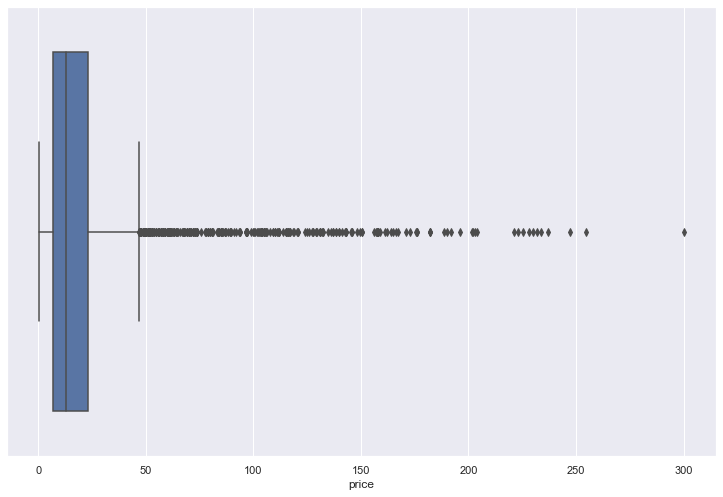

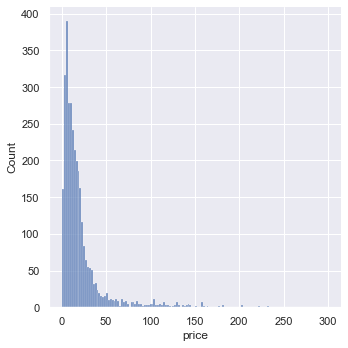

In [425]:
sns.boxplot(x=df_products['price'])
sns.displot(df_products['price'],kde=False)
plt.show()

On regarde mmaintenant la repartition du *prix* par *categorie*.

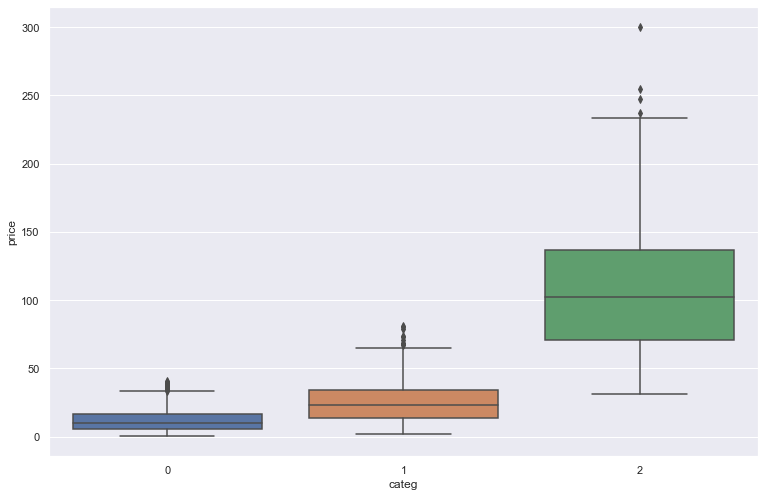

In [426]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.boxplot(x=df_products["categ"], y=df_products["price"])
plt.show()

In [24]:
df_products.groupby('categ').describe()

price                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

On s'appercoit que les catégories semble être distribuées par prix. </br>
- 50% des prix de la cateégorie 0 sont concentrés entre 5.6 et 16.7 euros. </br>
- 50% des prix de la catégorie 1 sontconcentrés entre 13.4 et 34 euros. </br>
- 50% des prix de la catégorie 2  sontconcentrés entre 71.1 et 137 euros. </br>
Les prix de la categorie 2 sont largement plus dispercés ( ecart type de 49.6)


On remarque aussi que la majorité des livres sont de catégorie 0.

## B) Evolution dans le temps

### Analyse comparative : taux de croissance mensuel du chiffre d'affaires 
Le taux de croissance d'un mois à l'autre refléte l'**évolution  du CA d'un mois sur l'autre**.</br>
- *Formule du taux de croissance : (mois actuel - mois de precedent)/ (mois precedent) x 100* </br>

Ici, nous comparons le chiffre d'affaires mensuel entre chaque mois et utilisons un graphique à barres et une ligne pour montrer l'évolution de la tendance de son chiffre d'affaires.

Je calcule le CA pour chaque mois.

In [33]:
gg=troisfichier2.copy()
gg1 =gg.groupby(['year','month'], as_index=False ).agg({'price':'sum' })
gg1.head(3)

,year,month,price
0,2021,3,482440.61
1,2021,4,476109.30
2,2021,5,492943.47


Je transforme l'index en période de mois qui sera utilisé sur l'axe X.

In [34]:
def fun(r):
    return "{}-{}".format(str(r[0]).zfill(2), str(r[1]).zfill(2))
gg1['date_Ym'] = gg1.apply(fun, axis=1)
gg1['date_Ym'] = gg1.apply(fun, axis=1)
gg1.head(3)

,year,month,price,date_Ym
0,2021,3,482440.61,2021-03
1,2021,4,476109.30,2021-04
2,2021,5,492943.47,2021-05


In [35]:
gg1.set_index(pd.DatetimeIndex(gg1['date_Ym']), inplace=True) #set date Ym as datetime index (for being X axe)
gg1 = gg1.to_period(freq='M') # to period (freq ='M') xxxx-xx-xx to xxxx-xx (only keep year and month)
gg1.head()

,year,month,price,date_Ym
date_Ym,,,,
2021-03,2021,3,482440.61,2021-03
2021-04,2021,4,476109.30,2021-04
2021-05,2021,5,492943.47,2021-05
2021-06,2021,6,484088.56,2021-06
2021-07,2021,7,482835.40,2021-07


J'utilise .pct_change() pour calculer le taux de croissance.</br>
*Formaule du taux de croissance : (mois actuel - mois de precedent)/ (mois precedent) x 100 %* 

In [36]:
gg1['month to month ratio']= round(gg1['price'].pct_change()*100,2)
gg1.head()

,year,month,price,date_Ym,month to month ratio
date_Ym,,,,,
2021-03,2021,3,482440.61,2021-03,NaN
2021-04,2021,4,476109.30,2021-04,-1.31
2021-05,2021,5,492943.47,2021-05,3.54
2021-06,2021,6,484088.56,2021-06,-1.80
2021-07,2021,7,482835.40,2021-07,-0.26


posx and posy should be finite values
posx and posy should be finite values


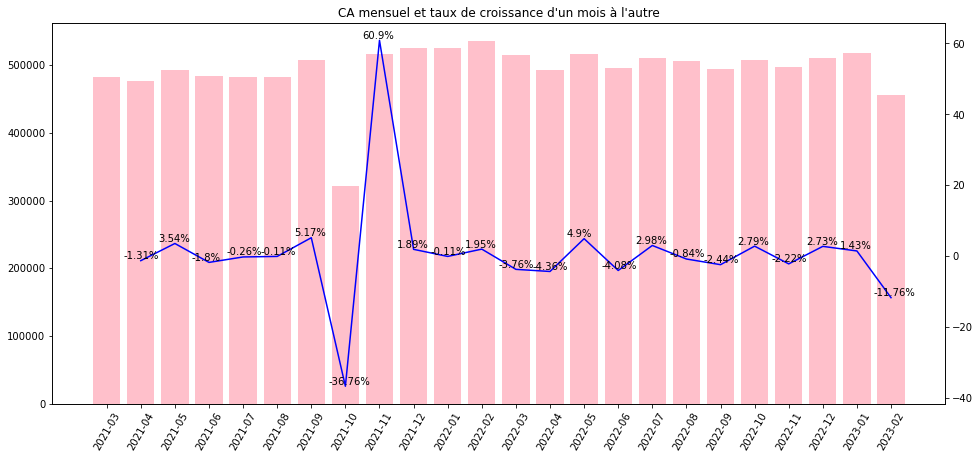

In [37]:
fig = plt.figure(figsize=(16,7))
ax2 = fig.add_subplot()
ax2.bar(gg1['date_Ym'],gg1['price'],color='pink') 
plt.title('CA mensuel et taux de croissance d\'un mois à l\'autre') 
plt.xticks(gg1['date_Ym'],gg1.index,rotation=60)  

ax3 = ax2.twinx()  
ax3.plot(gg1['date_Ym'],gg1['month to month ratio'],c='b')  

for i,j in enumerate(gg1['month to month ratio']): 
    plt.text(i-0.5,j+0.5,str(j)+'%')            
plt.show()  

On voit que il y a une chute du CA pour le mois d'Octobre 2021.</br>
De plus, on observe une baisse du CA pour le dernier mois( Fevrier 2023).

### La baisse de février 2023 est elle anormale ? 
Nous allons comparer le CA par catégorie avec la période de l'annee précédente.


Je calcule d'abord le CA mensuel par catégorie

In [38]:
gg=troisfichier2.copy()
gg2 =gg.groupby(['year','month','categ'], as_index=False ).agg({'price':'sum'})
gg2.head()

,year,month,categ,price
0,2021,3,0,193629.17
1,2021,3,1,186974.17
2,2021,3,2,101837.27
3,2021,4,0,205222.46
4,2021,4,1,156138.35


On prepare deux groupes. Un pour comparer le CA de Janvier, et un autre pour celui de Fevrier (sur les annees 2022 - 2023)

In [39]:
mask = gg2['month']== 1
mask1 = gg2['month']== 2
t1=gg2[(mask | mask1)]
t1.head()

,year,month,categ,price
30,2022,1,0,164210.51
31,2022,1,1,256267.92
32,2022,1,2,104860.56
33,2022,2,0,183197.33
34,2022,2,1,213120.64


On calcule enfin le taux de croissance du mois d'une année sur l'autre (YoY+%) avec la fonction "pct_change".

In [40]:
t1['year on year rate']= round(t1['price'].pct_change(periods=6)*100,2)
t1.tail(6)

C:\Users\Gigi jaune\AppData\Local\Temp\ipykernel_4164\1967661534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['year on year rate']= round(t1['price'].pct_change(periods=6)*100,2)


,year,month,categ,price,year on year rate
66,2023,1,0,181283.06,10.40
67,2023,1,1,210104.41,-18.01
68,2023,1,2,126153.08,20.31
69,2023,2,0,162457.00,-11.32
70,2023,2,1,180347.24,-15.38
71,2023,2,2,113875.52,-18.22


Ici, on peut voir que la croissance pour le mois de février est négative pour toute les catéories. C'est une croissance négative à deux chiffres.

Text(0, 0.5, 'CA')

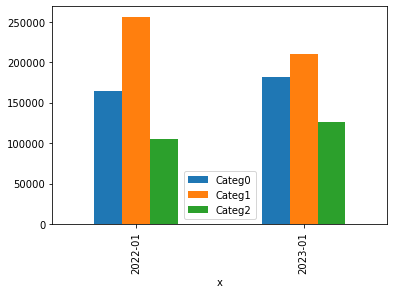

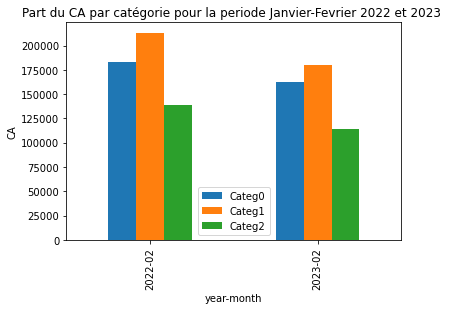

In [41]:
ax1 = fig.add_subplot(1,2,1)
# creating dataframe
df = pd.DataFrame({
    'x': ['2022-01','2022-02','2023-01','2023-02'],
    'Categ0': t1[t1.categ.eq(0)]['price'].values,
    'Categ1': t1[t1.categ.eq(1)]['price'].values,
    'Categ2': t1[t1.categ.eq(2)]['price'].values,
    'month' : [1,2,1,2],
    'rate0': t1[t1.categ.eq(0)]['year on year rate'].values,
    'rate1': t1[t1.categ.eq(1)]['year on year rate'].values,
    'rate2': t1[t1.categ.eq(2)]['year on year rate'].values
})

df_tmp_1 = df[df.month == 1]
df_tmp_2 = df[df.month == 2]
#用value去取serie裡不包含column title的值 
# plotting graph
df_tmp_1.plot(x="x", y=['Categ0', 'Categ1', 'Categ2'], kind="bar")
ax2 = fig.add_subplot(1,2,2)
a = df_tmp_2.plot(x="x", y=['Categ0', 'Categ1', 'Categ2'], kind="bar")
plt.title("Part du CA par catégorie pour la periode Janvier-Fevrier 2022 et 2023 ")
plt.xlabel("year-month")
plt.ylabel("CA")

Il y a une baisse de la part du CA évidente pour le mois de Février par rapport a l'année précédente. </br>
S'il ne s'agit pas d' un manque de donnnées pour Février 2023.

### Analyse de la moyenne mobile
Ici, on va utiliser le CA quotidien et afficher la moyenne mobile afin d'évaluer la tendance globale

*Quest ce que la moyenne mobile? 
Elle permet de lisser une série de valeurs exprimées en fonction du temps et d'éliminer les fluctuations les moins significatives. </br>
Plus la période considérée est longue, moins la moyenne mobile est sensible aux variations quotidiennes du cours.*

Je calcule le CA par date. 

In [45]:
mb=troisfichier2.copy()
mb=mb.groupby(['date2']).agg({'price':'sum'}).reset_index().rename({'price' : 'CA quotidien'},axis="columns")
mb.head()

,date2,CA quotidien
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


In [49]:
mb.head()

,date2,CA quotidien
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


Ensuite, je fais la moyenne mobile sur  10, 30 et 60 jours.

<AxesSubplot:title={'center':'CA quotidien avec Moyenne Mobile sur 60 jours'}, xlabel='date3'>

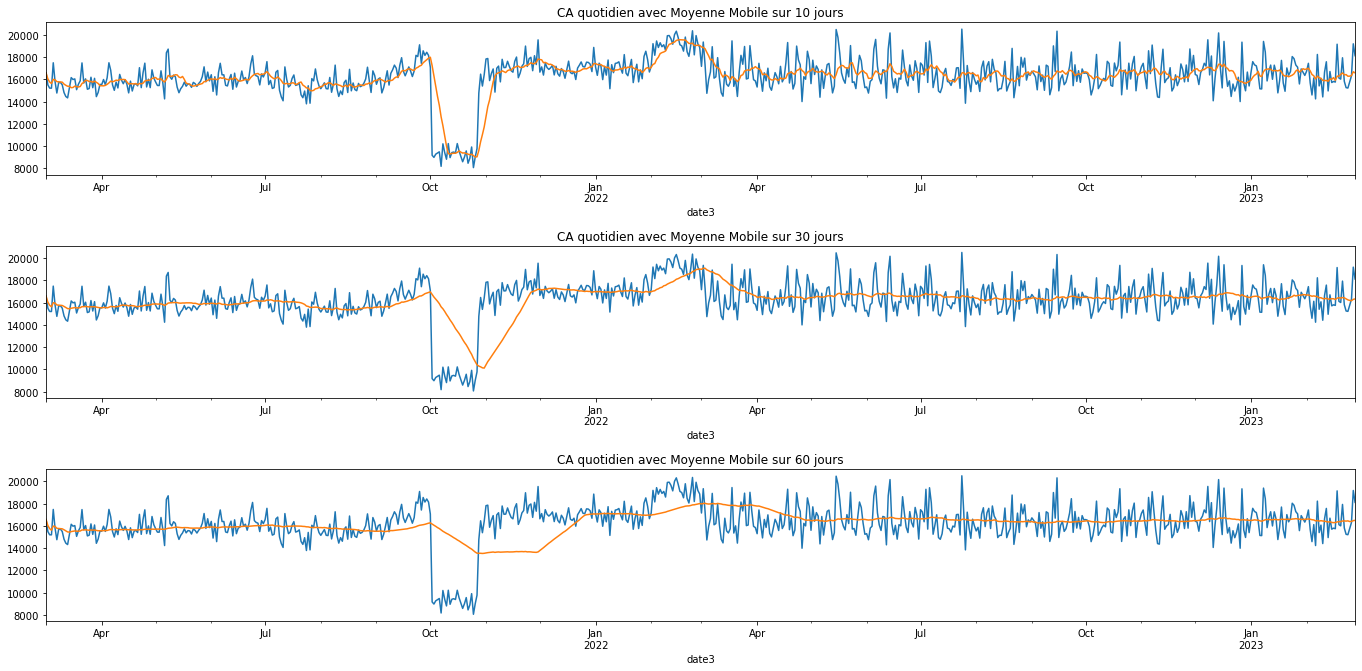

In [51]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# On utilise la date comme index
mb['date3'] = pd.to_datetime(mb['date2'])
mb.index = mb['date3']

# 30,60,120jours moyenne mobile
c = mb['CA quotidien']
c30 = c.rolling(10,min_periods=1).mean() # le CA moyenne sur 1 mois
c60 = c.rolling(30,min_periods=1).mean() #le CA moyenne sur 2 mois
c120 = c.rolling(60,min_periods=1).mean() #le CA moyenne sur 4 mois

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.tight_layout(pad=5.0) 
c['2021':].plot(ax=axes[0],title='CA quotidien avec Moyenne Mobile sur 10 jours')
c30['2021':].plot(ax=axes[0]) 
c['2021':].plot(ax=axes[1],title='CA quotidien avec Moyenne Mobile sur 30 jours')
c60['2021':].plot(ax=axes[1]) 
c['2021':].plot(ax=axes[2],title='CA quotidien avec Moyenne Mobile sur 60 jours')
c120['2021':].plot(ax=axes[2])

On peut voir que la tendance globale est stable depuis environ avril 2022.</br>
On observe une hausse du CA entre févrie et marche 2022.</br>
On remarque aussi qu'il semble manquantes des données entre octocbre et novembre 2021.

### Pourquoi il y a t-il une baisse en octocbre 2021?  

Il y a t-il des données manquantes pendant cette période?

Je choisis la periode concernée par la chute de CA.

In [63]:
merged_date = troisfichier2.copy()
mask_selected_date = merged_date.date.between("2021-09-25" , "2021-11-01")
merged_date= merged_date[mask_selected_date]
merged_date=merged_date.groupby(['date2']).agg({'price':'sum', 'date':'first'}).reset_index('date2')
merged_date.head(3)

,date2,price,date
0,2021-09-25,19080.29,2021-09-25 10:21:35.822143
1,2021-09-26,17419.29,2021-09-26 12:37:29.780414
2,2021-09-27,18542.39,2021-09-27 04:50:37.431817


Je dessine le diagrame pour voir plus en details

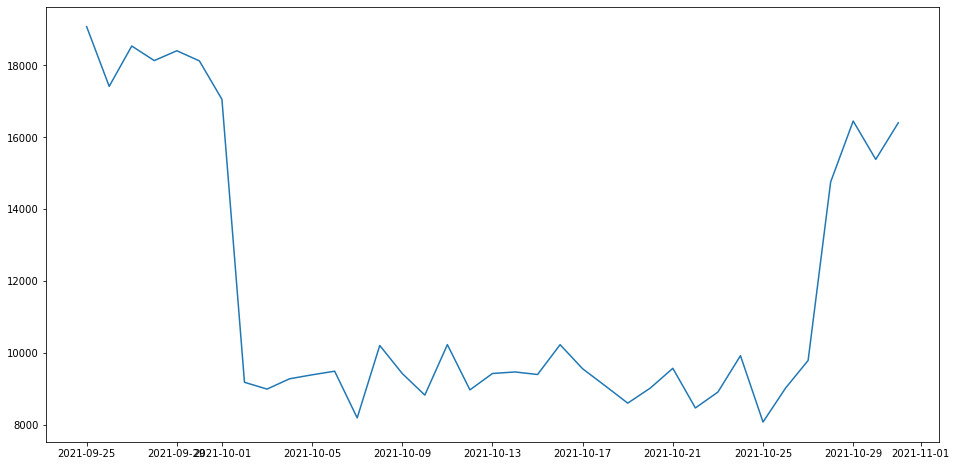

In [57]:
rcParams['figure.figsize'] = 10,5
scaler = MinMaxScaler(feature_range=(0, 1))
merged_date.index = merged_date['date2']
plt.figure(figsize=(16,8))
plt.plot(merged_date['price'], label='CA quotidien')

In [65]:
mask_selected_date = merged_date.date.between("2021-09-25" , "2021-11-01")
merged_date= merged_date[mask_selected_date]
merged_date=merged_date.groupby(['date2']).agg({'price':'sum'})
merged_date

,price
date2,
2021-09-25,19080.29
2021-09-26,17419.29
2021-09-27,18542.39
2021-09-28,18136.65
2021-09-29,18410.71
2021-09-30,18128.01
2021-10-01,17058.34
2021-10-02,9182.13
2021-10-03,8993.05


On voit donc que la chute du CA concerne la periode du **02/10/2021 au 27/10/2021**. </br>
Maintenant, on vérifie les catégories trouvées pendent cette période. 

In [239]:
mask_selected_date = troisfichier2.date.between("2021-10-02" , "2021-10-27")
pd.unique(troisfichier2[mask_selected_date]['categ'])

array([0, 2], dtype=int64)

Il n' y a que les catégories 0 et 2. **Il manque la categorie 1**. </br>
##### Est-ce pareil si on prend une autre periode? </br>
On élargie la periode pour prendre des jours normaux.

In [240]:
mask_selected_date = troisfichier2.date.between("2021-09-25" , "2021-11-01")
pd.unique(troisfichier2[mask_selected_date]['categ'])

array([0, 1, 2], dtype=int64)

Il semble que la chute de CA soit lié a une absence de données de la catégorie 1.

On va compter le nombre de fois que la catégorie 1 est apparue sur une periode élargie, pour vérifier s'il s'agit d' un hasard ou bien d'une absence de données.

In [242]:
mask_selected_date = troisfichier2.date.between("2021-09-25" , "2021-10-30") & troisfichier2.categ == 1

troisfichier2[mask_selected_date].groupby(['categ','date2']).agg({'id_prod':'count'})

id_prod
categ date2              
1     2021-09-25      357
      2021-09-26      290
      2021-09-27      334
      2021-09-28      298
      2021-09-29      327
      2021-09-30      342
      2021-10-01      344
      2021-10-28      316
      2021-10-29      326

On voit bien qu'on a pas de données pour la catégories 1 entre le 2 Octobre et le 27 Octobre. </br>
Il s'agit donc bien d'**une absence des données de transactions des livres de catégorie 1** pour cette période.

## Les tops ( meilleurs ventes) &  les flops (les plus mauvais ventes)

### Quels produits ont été le plus vendus?

In [244]:
nb_chaquepd= troisfichier.copy()
nb_chaquepd['CAproduct'] = nb_chaquepd.groupby(['id_prod', 'categ']).price.transform('sum')
#nb_chaquepd['CAproductTotal'] = nb_chaquepd.price.sum()
nb_chaquepd = nb_chaquepd.value_counts(subset=['id_prod', 'categ', 'price', 'CAproduct'])
nb_chaquepd.head(2)

id_prod  categ  price  CAproduct
1_369    1      23.99  54025.48     2252
1_417    1      20.99  45947.11     2189
dtype: int64

In [245]:
nb_chaquepd = nb_chaquepd.reset_index(name='nb_chaque_produit')
nb_chaquepd.head(2)

,id_prod,categ,price,CAproduct,nb_chaque_produit
0,1_369,1,23.99,54025.48,2252
1,1_417,1,20.99,45947.11,2189


### Voici le top 5 des produits les plus vendus avec leur contribution au CA

In [246]:
nb_chaquepd.loc[0:4]
## les cinqs produits les plus vendus avec le CA 

,id_prod,categ,price,CAproduct,nb_chaque_produit
0,1_369,1,23.99,54025.48,2252
1,1_417,1,20.99,45947.11,2189
2,1_414,1,23.83,51949.40,2180
3,1_498,1,23.37,49731.36,2128
4,1_425,1,16.99,35611.04,2096


On peut voir la performance global pour chaque catégorie en terme de répartition du CA.

In [247]:
nb_chaquepd_categ = nb_chaquepd.groupby('categ').CAproduct.agg('sum').reset_index(name='CA total sur deux ans')
nb_chaquepd_categ
#graphique en bar 

,categ,CA total sur deux ans
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


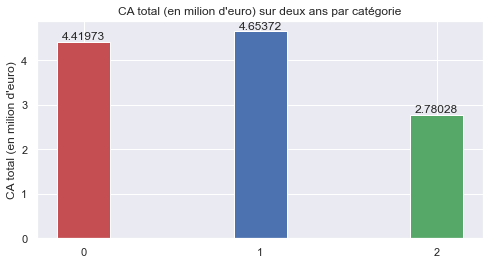

In [249]:
plt.rcParams['figure.figsize'] = 8,4
fig, ax = plt.subplots()
categ1 =nb_chaquepd_categ ['categ'].astype('string')
sum1 =nb_chaquepd_categ['CA total sur deux ans'].values / 1000000 
bar_colors = ['r', 'b','g']

ax.bar(categ1, sum1, color=bar_colors, width=0.3)
ax.set_ylabel('CA total (en milion d\'euro)')
ax.set_title('CA total (en milion d\'euro) sur deux ans par catégorie')
ax.bar_label(ax.containers[0])
plt.show()

On peux voir que la catégorie 1 en dans premier place en terme de CA, 
alors que la catégorie 2 représente une part plus faible du CA.

# Informations sur les profils clients

### Répartition par sexe des clients
(cela inclut les 21 clients qui n'ont pas fait d'achat)

On calcule nombre de clients par sexe.

In [260]:
df_customers2 =df_customers.copy()
df_customers3 = df_customers2.groupby(['sex']).count().reset_index()
df_customers3.client_id = pd.to_numeric(df_customers3.client_id)
df_customers3

,sex,client_id,birth
0,f,4490,4490
1,m,4131,4131


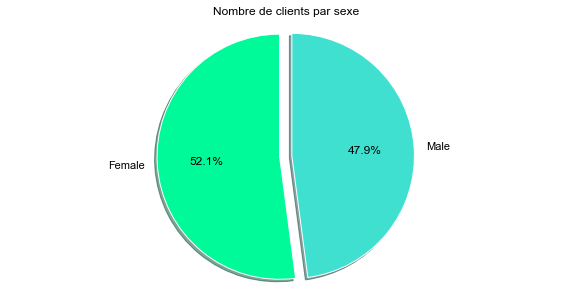

In [264]:
plt.rcParams['text.color']='black'
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = df_customers3['client_id'].values * 100
explode = (0, 0.1)  # 塊狀之間的間距

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = ['mediumspringgreen', 'turquoise'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Nombre de clients par sexe')
plt.show()

L'écart des ratios entre les clients hommes/femmes est relativement faible (environ 4 %).

# Répartition des clients par tranche d'age

Je calcule d'abord l'âge actuel des clients.
et je groupe par tranche d'âge en 6 groupes. 

In [265]:
# calculer l'age
now = 2023
df_customers['age'] = now - df_customers['birth']

#classer d'age
bins= [18,25,35,45,55,65,100]
labels = ['18-24','25-34','35-44','45-54','55-64','65+']
df_customers['age_group'] = pd.cut(df_customers['age'], bins=bins, labels=labels, right=False)
df_customers.head(5)

,client_id,sex,birth,age,age_group
0,c_4410,f,1967,56,55-64
1,c_7839,f,1975,48,45-54
2,c_1699,f,1984,39,35-44
3,c_5961,f,1962,61,55-64
4,c_5320,m,1943,80,65+


Je calcule le nombre de personnes dans chaque classe d'âge.
Et je dessine le diagramme en bâton.

In [266]:
dfnombre = df_customers.groupby('age_group')['age'].count().reset_index()
dfnombre.head()

,age_group,age
0,18-24,1155
1,25-34,1566
2,35-44,1780
3,45-54,1610
4,55-64,1234


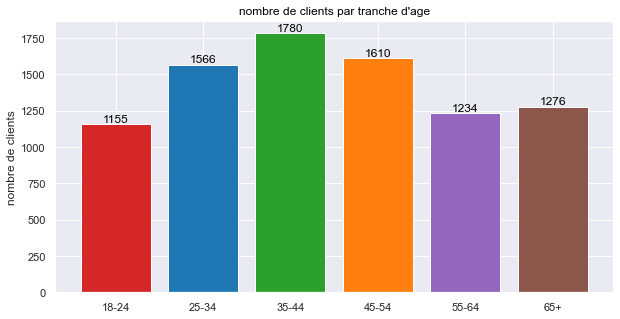

In [267]:
plt.rcParams['text.color']='black'
# nombre de clients par tranche d'age
fig, ax = plt.subplots()
class_age = dfnombre['age_group']
counts = dfnombre['age']
bar_labels = dfnombre['age_group']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple','tab:brown']
ax.bar(class_age , counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('nombre de clients')
ax.set_title('nombre de clients par tranche d\'age')
ax.bar_label(ax.containers[0])
plt.show()

On voit que la tranche d'âge 35-44 est la plus représentée. 

Je calcule le pourcentage pour chaque groupe d'age.

In [268]:
df_customers['pourcentage'] = df_customers.groupby('age_group').transform("count")["age"]
df_customers['pourcentage'] *= 100 / df_customers.shape[0]
df_customers.head()

,client_id,sex,birth,age,age_group,pourcentage
0,c_4410,f,1967,56,55-64,14.313885
1,c_7839,f,1975,48,45-54,18.675328
2,c_1699,f,1984,39,35-44,20.647257
3,c_5961,f,1962,61,55-64,14.313885
4,c_5320,m,1943,80,65+,14.801067


In [270]:
df_ratio_per_age_group = df_customers.drop_duplicates(subset='age_group', keep='first').copy()
# we use sort pour trier (this one is the second version from the previous copy dataframe)
df_ratio_per_age_group.sort_values(by= ['age'], inplace = True)
df_ratio_per_age_group

,client_id,sex,birth,age,age_group,pourcentage
13,c_2998,m,2003,20,18-24,13.397518
5,c_415,m,1993,30,25-34,18.164946
2,c_1699,f,1984,39,35-44,20.647257
1,c_7839,f,1975,48,45-54,18.675328
0,c_4410,f,1967,56,55-64,14.313885
4,c_5320,m,1943,80,65+,14.801067


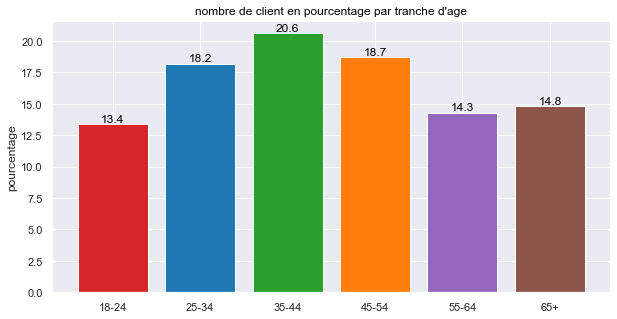

In [271]:
plt.rcParams['text.color']='black'
fig, ax = plt.subplots()
class_age = df_ratio_per_age_group['age_group']
counts = df_ratio_per_age_group['pourcentage']
bar_labels = df_ratio_per_age_group['age_group']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple','tab:brown']

ax.bar(class_age , counts.round(1), label=bar_labels, color=bar_colors)
ax.set_ylabel('pourcentage')
ax.set_title('nombre de clients en pourcentage par tranche d\'age')
ax.bar_label(ax.containers[0])
plt.show()

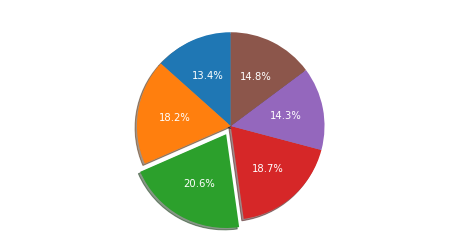

In [136]:
plt.rcParams['text.color']='white'
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_ratio_per_age_group['age_group']
sizes = df_ratio_per_age_group['pourcentage']
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('nombre de clients en pourcentage par tranche d\'age')
plt.show()

Donc la tranche d'âge 35-44 ans représente environ 21%. Ce sont nos plus grand clients.
les 18-24 ans sont les moins représentés.

# Répartition du sexe par tranche d'age

Je calcule le nombre de clients par tranche d'age et sexe, et le mets dans la colonne 'nb'. 

In [415]:
nombreclients = df_customers.copy()
nombreclients['nb'] = nombreclients.groupby(['age_group', 'sex'])['pourcentage'].transform('count')
nombreclients.drop_duplicates(subset=['age_group', 'sex'],inplace=True)
nombreclients.head()

,client_id,sex,birth,age,age_group,pourcentage,nb
0,c_4410,f,1967,56,55-64,14.313885,629
1,c_7839,f,1975,48,45-54,18.675328,856
2,c_1699,f,1984,39,35-44,20.647257,921
4,c_5320,m,1943,80,65+,14.801067,588
5,c_415,m,1993,30,25-34,18.164946,761


Je sépare les dataframes par genre des clients.

In [418]:
# we use sort pour trier
nombreclients.sort_values(by= ['age'], inplace = True)
#extract only for men
nombreclientsm = nombreclients.loc[nombreclients["sex"]=='m',:]
#extract only for women
nombreclientsf = nombreclients.loc[nombreclients["sex"]=='f',:]

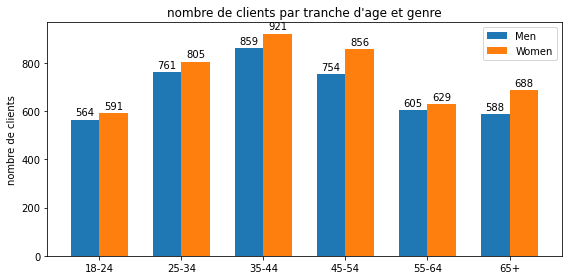

In [353]:
plt.rcParams['text.color']='black'
labels = nombreclientsf['age_group']
mennombre = nombreclientsm['nb']
womennombre = nombreclientsf['nb']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mennombre, width, label='Men')
rects2 = ax.bar(x + width/2, womennombre, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('nombre de clients')
ax.set_title('nombre de clients par tranche d\'age et genre')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

fig.tight_layout()
plt.show()

la tranche d'âge de 35-44 ans est la plus importante, Suivi de la tranche des 45-54 puis des 25-34.
On voit que globalement les femmes sont plus nombreuses que les hommes dans chaque tranche.

# Répartition du CA par sexe

Je prépare les données par sexe.

In [272]:
#nombre de clients par sexe
df_customers3

,sex,client_id,birth
0,f,4490,4490
1,m,4131,4131


In [274]:
# nombre de ventes par sexe
df1=troisfichier.copy()
df1 = df1.groupby(['sex']).price.count().reset_index()
df1

,sex,price
0,f,338285
1,m,340826


In [275]:
# CA par sexe
tf1=troisfichier.copy()
tf1= tf1.groupby(['sex']).agg({'price':'sum'}).reset_index()
tf1

,sex,price
0,f,5859683.13
1,m,5994045.55


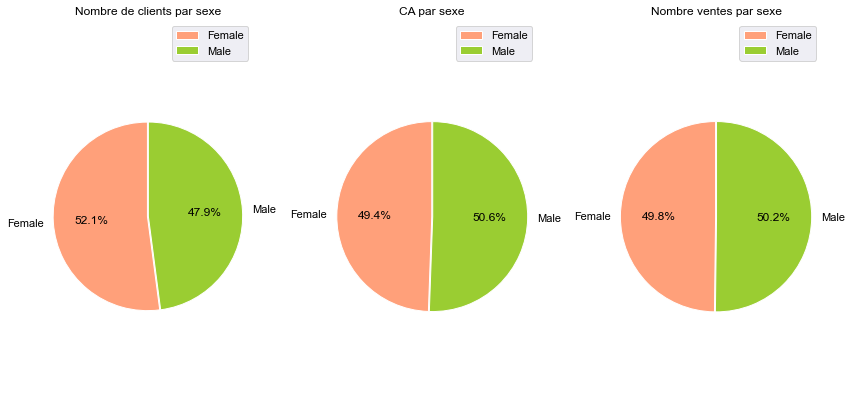

In [276]:
plt.rcParams['text.color']='black'
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = df_customers3['birth'].values * 100
sizes1 = tf1['price']
sizes2 = df1['price'].values * 100
explode = (0, 0.01)  # 塊狀之間的間距


fig1 = plt.figure(facecolor='white',figsize=(12,6))
ax1 = plt.subplot(1,3,1)
ax1.set_title("Nombre de clients par sexe")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,colors = ['lightsalmon', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels)

ax1=plt.subplot(1,3,2)
ax1.set_title("CA par sexe")
ax1.pie(sizes1, explode=explode,labels=labels,
        shadow=False, startangle=90, autopct='%1.1f%%',colors = ['lightsalmon', 'yellowgreen'])
ax1.axis('equal')
ax1.legend(labels)

ax1=plt.subplot(1,3,3)
ax1.set_title("Nombre ventes par sexe")
ax1.pie(sizes2, explode=explode,startangle=90,labels=labels,autopct='%1.1f%%',colors = ['lightsalmon', 'yellowgreen'])
ax1.axis('equal')
ax1.legend(labels)
plt.tight_layout()
plt.show()

Si on regarde le nombre de clients par sexe, les femmes sont un peu plus nombreuses que les hommes, mais la part de CA et le nombre d'achats sont équilibrées entre les deux sexes.

# Répartition du chiffre d'affaire par tranche d'âge et le genre

Je calcule le CA par tranche d'âge et le genre

In [71]:
ca_age= tf1.groupby(['age_group','sex'],as_index = False).agg({'price':'sum'}).rename(columns={'price':'CA'})
ca_age.head()

,age_group,sex,CA
0,18-24,f,769075.43
1,18-24,m,1035314.61
2,25-34,f,1113708.80
3,25-34,m,1055365.95
4,35-44,f,1429417.53


In [72]:
# faire le ratio du CA
ca_age['pourcentage']= ca_age['CA']*100 / ca_age['CA'].sum()
ca_age.head()

,age_group,sex,CA,pourcentage
0,18-24,f,769075.43,6.488047
1,18-24,m,1035314.61,8.734084
2,25-34,f,1113708.80,9.395430
3,25-34,m,1055365.95,8.903240
4,35-44,f,1429417.53,12.058801


Je sépare en deux dataframes pour chaque genre.

In [73]:
#extract only for men
ca_m = ca_age.loc[ca_age["sex"]=='m',:]
#extract only for women
ca_f = ca_age.loc[ca_age["sex"]=='f',:]
ca_f.head()

,age_group,sex,CA,pourcentage
0,18-24,f,769075.43,6.488047
2,25-34,f,1113708.80,9.395430
4,35-44,f,1429417.53,12.058801
6,45-54,f,1176592.43,9.925927
8,55-64,f,741902.20,6.258809


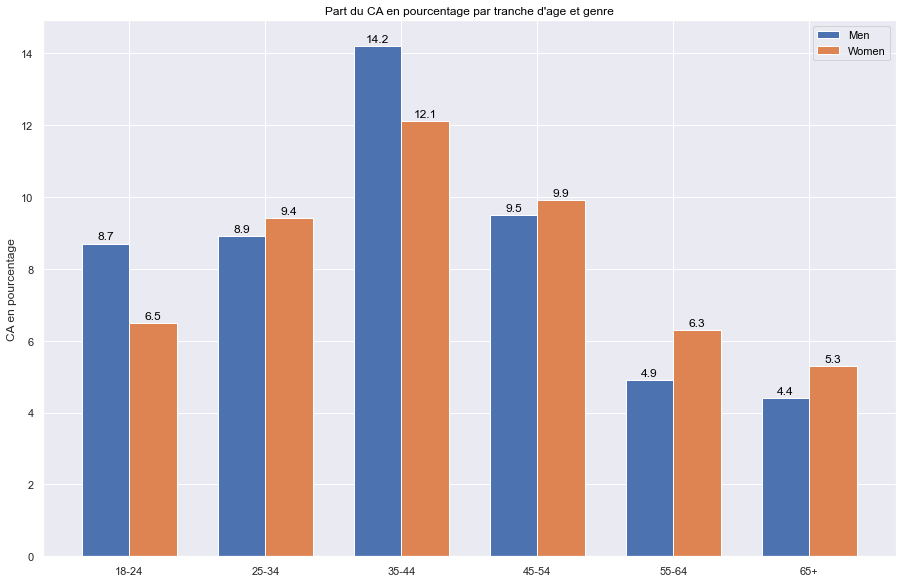

In [74]:
plt.rcParams['text.color']='black'
labels = ca_f['age_group']
men = ca_m['pourcentage']
women = ca_f['pourcentage']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men.round(1), width, label='Men')
rects2 = ax.bar(x + width/2, women.round(1), width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CA en pourcentage')
ax.set_title('Part du CA en pourcentage par tranche d\'age et genre')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

fig.tight_layout()

plt.show()

La tranche d' âge ddes 35-44 est celle qui participe le plus au CA, suivi des 45-54 et des 25-34. 
On remarque que chez les hommes, la part des 18-24 est aussi importante.

# Répartition du CA par client
### Courbe de lorenz

#### Qu'est-ce que la courbe de Lorenz?
*La courbe de Lorenz est une représentation graphique permettant de visualiser la distribution d'une variable au sein d'une population.
Ici, la courbe de Lorenz va etre  utilisée pour représenter la répartition du CA au sein de la population des clients (customers).
Cette population va etre découpée en dix fractiles. On parle de 'décile' de population. Le premier décile représente les 10 % de la population qui represente la part la plus modeste du CA, le second décile les 20 %  representant la part la plus modestes, etc*


Pour dessiner la courbe de Lorenz, je calcule d'abord la part de CA que represente chaque client.

In [401]:
#這樣就出現每個客戶的CA (pour courbe de lorenz)
caclient=tf1.groupby(['client_id']).price.agg('sum').reset_index(name='CA')
caclient.head()

,client_id,CA
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


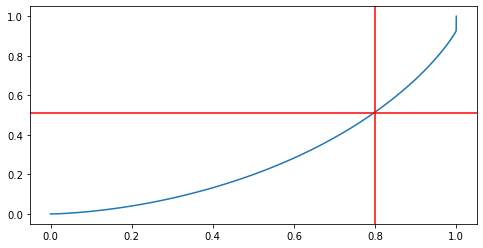

In [409]:
dep = caclient.CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
#lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
ax =plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.axvline(0.8, color='r')
plt.axhline(0.51, color='r')
plt.show()

Ici, on a ajoute les lignes rouges qui se croisent pour faciliter l'analyse. Cela signifie que les 80% des clients representants la part la plus modeste du CA ne possedent que 50% du CA total. Donc inversement, les 20% des meilleurs clients participe a presque 50% du CA.

L'indice Gini permet de decrire le niveau d'egalite de la repartition du CA par clients. Si il est de 0, cela veux dire que la repartition parfaitement egale (et donc forme une bissectice). Plus le Gini se rapproche de 1, plus la repartition est inegalitaire.

In [404]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4463865414359123

Le Gini ici est de 0.45, ce qui montre une asssez forte inegalite.
En effet, en regardant la courbe de Lorenz on voit que :
1.	Les 20% des meilleurs clients participent pour un peu moins de 50% du CA 
2.	Les 10% des meilleurs clients participent pour environs 25% du CA
3.	Mais seulement 20 % du CA est apporté par 50 % clients .


# Répartition des ages par genre et catégorie

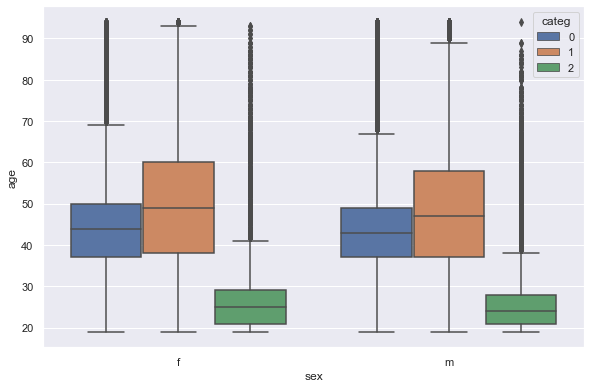

In [429]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(9.7,6.27)})

sns.boxplot(x=tf1["sex"], y=tf1["age"],hue=tf1["categ"])
plt.show()

On voit que le genre n' influe pas beaucoup sur le choix des catégories de livres.
Cependant, la catégorie du livre achetée sans être avoir un lien avec l'âge.
Particulièrement, un phénomène intéressant est que la catégorie 2 des livres est plus apprécie par les jeunes de 20 à 30 ans. 